# Reference: Python Data Science Handbook


 https://jakevdp.github.io/PythonDataScienceHandbook

# Evaluation Metrics

### Accuracy
This is the number of correct predictions over the total number of predictions. It's the percent you predicted correctly. 

### Shortcomings of Accuracy
Accuracy can be a misleading metric for imbalanced data sets. Consider a sample with 95 negative and 5 positive values. Classifying all values as negative in this case gives 0.95 accuracy score!

### Confusion Matrix

* **True Positives (TP)**: Correct positive predictions
* **False Positives (FP)**: Incorrect positive predictions (false alarm)
* **True Negatives (TN)**: Correct negative predictions
* **False Negatives (FN)**: Incorrect negative predictions (a miss)

|            | Predicted '+'  | Predicted '-'  |
| ---------- | -------------- | -------------- |
| Actual '+' | True positive  | False negative |
| Actual '-' | False positive | True negative  |


### Other metrics

* **Precision**: A measure of how good your positive predictions are
    ```
    Precison = TP / (TP + FP)             
    ```
* **Recall, Sensitivity, True positive rate**: 
    ```
    Recall = Tp / P
           = TP / (TP + FN) 
    ```
    It describes how good the model is at predicting the positive class when the actual outcome is positive.
    
* **F1 Score**: The harmonic mean of Precision and Recall
    ```
    F1 = 2 / (1/Precision + 1/Recall)
       = 2 * Precision * Recall / (Precision + Recall)
       = 2TP / (2TP + FN + FP)
    ```
The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.

Accuracy can also be written in this notation:
```
Accuracy = (TP + TN) / (TP + FP + TN + FN)
```

* **Specificity , True negative rate**:
    ```
    Specificity = TN / N 
                = TN / (TN + FP)
    ```
    
* **False Positive rate**:  
    ```
    FPR = FP / (FP + TN)
        = 1 -  Sprecificity
    ```
    It is also called the false alarm rate as it summarizes how often a positive class is predicted when the actual outcome is negative.
    
    The false positive rate is also referred to as the inverted specificity. 


![](http://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

## ROC Curves

### Predicting Probabilities

In a classification problem, we may decide to predict the class values directly.

Alternately, it can be more flexible to predict the probabilities for each class instead. The reason for this is to provide the capability to choose and even calibrate the threshold for how to interpret the predicted probabilities.

For example, a default might be to use a threshold of 0.5, meaning that a probability in [0.0, 0.49] is a negative outcome (0) and a probability in [0.5, 1.0] is a positive outcome (1).

This threshold can be adjusted to tune the behavior of the model for a specific problem. An example would be to reduce more of one or another type of error.

When making a prediction for a binary or two-class classification problem, there are two types of errors that we could make.

* **False Positive**: Predict an event when there was no event.
* **False Negative**: Predict no event when in fact there was an event.

By predicting probabilities and calibrating a threshold, a balance of these two concerns can be chosen by the operator of the model.

For example, in a smog prediction system, we may be far more concerned with having low false negatives than low false positives. A false negative would mean not warning about a smog day when in fact it is a high smog day, leading to health issues in the public that are unable to take precautions. A false positive means the public would take precautionary measures when they didn’t need to.

A common way to compare models that predict probabilities for two-class problems is to use a ROC curve.

What Are ROC Curves?
A useful tool when predicting the probability of a binary outcome is the Receiver Operating Characteristic curve, or ROC curve.

It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

The ROC curve is a useful tool for a few reasons:

* The curves of different models can be compared directly in general or for different thresholds.
The area under the curve (AUC) can be used as a summary of the model skill.
* The shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate.

To make this clear:

* Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
* Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

If you are confused, remember, when we predict a binary outcome, it is either a correct prediction (true positive) or not (false positive). There is a tension between these options, the same with true negative and false negative.

A skilful model will assign a higher probability to a randomly chosen real positive occurrence than a negative occurrence on average. This is what we mean when we say that the model has skill. Generally, skilful models are represented by curves that bow up to the top left of the plot.

A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. A model with no skill is represented at the point (0.5, 0.5). A model with no skill at each threshold is represented by a diagonal line from the bottom left of the plot to the top right and has an AUC of 0.5.

A model with perfect skill is represented at a point (0,1). A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right.

An operator may plot the ROC curve for the final model and choose a threshold that gives a desirable balance between the false positives and false negatives.

![](figures/roccurve.svg)

```
function ROC_curve(probabilities, labels):
    Sort instances by their prediction strength (probabilities)
    For every instance in increasing order of probability:
        Set the threshold to be the probability
        Set everything above the threshold to the positive class
        Calculate the True Positive Rate 
        Calculate the False Positive Rate 
    Return three lists: TPRs, FPRs, thresholds
```

In [1]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
print(fpr)
print(tpr)
print(thresholds)


[0.  0.  0.5 0.5 1. ]
[0.  0.5 0.5 1.  1. ]
[1.8  0.8  0.4  0.35 0.1 ]


[[0.00402732 0.99597268]
 [0.00200516 0.99799484]
 [0.99470117 0.00529883]
 [0.84762581 0.15237419]
 [0.00166665 0.99833335]]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


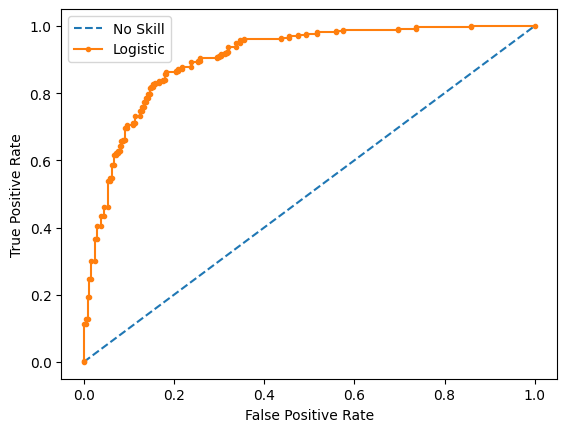

In [2]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)
print(lr_probs[:5, :])

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# summarize scores
print('\nNo Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

##  Naive Bayes Classification

## Bayesian Classification

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

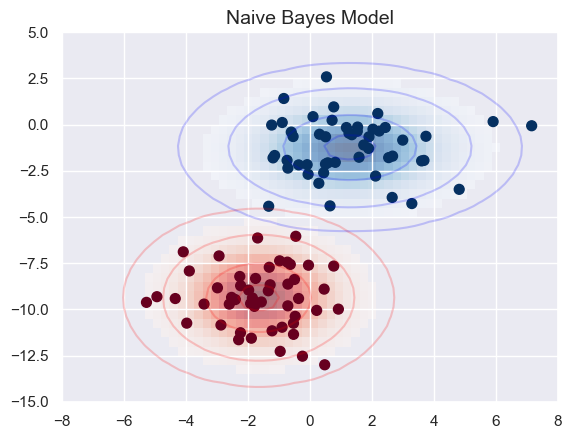

In [6]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots(1)

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

fig.savefig('gaussian-NB.png')


## Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:

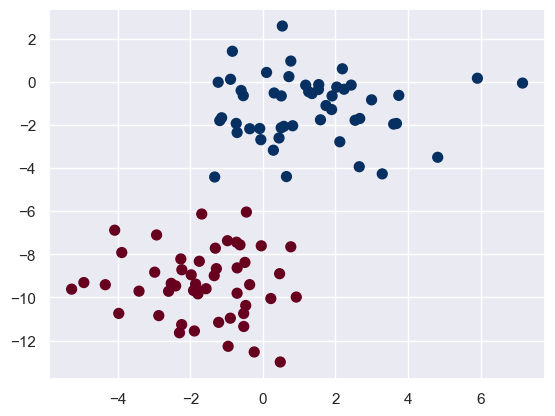

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution. The result of this naive Gaussian assumption is shown in the following figure:

![](figures/gaussian-NB.png)


The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses. With this generative model in place for each class, we have a simple recipe to compute the likelihood  𝑃(features | 𝐿1) and 𝑃(features | 𝐿2) for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's sklearn.naive_bayes.GaussianNB estimator:

The multivariate normal distribution of a $k$-dimensional random vector $\mathbf{X} = (X_1,\ldots,X_k)^{\mathrm T}$ can be written in the following notation:
$$
    \mathbf{X}\ \sim\ \mathcal{N}(\boldsymbol\mu,\, \boldsymbol\Sigma),
$$
or to make it explicitly known that $X$ is $k$-dimensional,
$$
    \mathbf{X}\ \sim\ \mathcal{N}_k(\boldsymbol\mu,\, \boldsymbol\Sigma),
$$
with $k$-dimensional mean vector
$$
\boldsymbol\mu = \operatorname{E}[\mathbf{X}] = ( \operatorname{E}[X_1], \operatorname{E}[X_2], \ldots, \operatorname{E}[X_k] ) ^ \textbf{T}, 
$$
and $k \times k$ covariance matrix
$$ 
\Sigma_{i,j} = \operatorname{E} [(X_i - \mu_i)( X_j - \mu_j)^T] = \operatorname{Cov}[X_i, X_j] $$
such that $1 \le i,j \le k$. The inverse of the covariance matrix is called the Precision  matrix, denoted by $\boldsymbol{Q}=\boldsymbol\Sigma^{-1}$.

The multivariate normal distribution is said to be ``non-degenerate`` when the symmetric covariance matrix $\boldsymbol\Sigma$ is Positive-definite matrix. In this case the distribution has probability density function

$$
f_{\mathbf X}(x_1,\ldots,x_k) = \frac{\exp\left(-\frac 1 2 ({\mathbf x}-{\boldsymbol\mu})^\mathrm{T}{\boldsymbol\Sigma}^{-1}({\mathbf x}-{\boldsymbol\mu})\right)}{\sqrt{(2\pi)^k |\boldsymbol\Sigma|}}
$$
where ${\mathbf x}$ is a real $k$-dimensional column vector and $|\boldsymbol\Sigma|\equiv \det\boldsymbol\Sigma$ is the determinant of $\boldsymbol\Sigma$, also known as the generalized variance. The equation above reduces to that of the univariate normal distribution if $\boldsymbol\Sigma$is a $1 \times 1$ matrix (i.e. a single real number).


In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [9]:
print(model.get_params())

{'priors': None, 'var_smoothing': 1e-09}


In [15]:
print(model.class_prior_)
print(model.theta_)
#print(help(model))

[0.5 0.5]
[[-1.64939095 -9.36891451]
 [ 1.29327924 -1.24101221]]


A Gaussian curve can serve as a "low pass" filter, allowing only the samples close to its mean to "pass." In the context of Naive Bayes, assuming a Gaussian distribution is essentially giving more weights to the samples closer to the distribution mean. This might or might not be appropriate depending if what you want to predict follows a normal distribution.

The variable, ``var_smoothing``, artificially adds a user-defined value to the distribution's variance (whose default value is derived from the training data set). This essentially widens (or "smooths") the curve and accounts for more samples that are further away from the distribution mean.

Now let's generate some new data and predict the label:

In [16]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

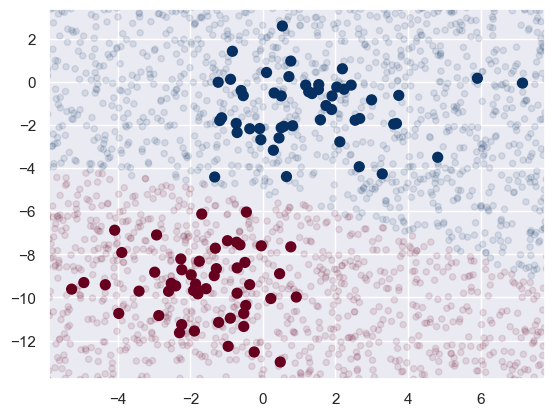

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the predict_proba method:

In [18]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

The columns give the posterior probabilities of the first and second label, respectively. If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results. Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

## Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label. Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

### Binomial distribution

If the random variable ``X`` follows the binomial distribution with parameters $n\in\mathbb{N}$ and $p\in [0,1]$, we write $X\sim B(n,p)$.  The probability of getting exactly ``k`` successes in ``n`` independent Bernoulli trials is given by the probability mass function:

$$
\Pr(k;n,p) = \Pr(X = k) = \binom{n}{k}p^k(1-p)^{n-k}
$$

for $k=0,1,2,
\cdots,n$, where

$$
\binom{n}{k} =\frac{n!}{k!(n-k)!}
$$

### Multinomial distribution
Suppose one does an experiment of extracting $n$ balls of $k$ different colors from a bag, replacing the extracted balls after each draw. Balls of the same color are equivalent. Denote the variable which is the number of extracted balls of color $i$ ($i = 1, \cdots, k$) as $X_i$, and denote as $p_i$ the probability that a given extraction will be in color $i$. The probability mass function of this multinomial distribution is:
$$
\begin{align}
f(x_1,\ldots,x_k;n,p_1,\ldots,p_k) & {} = \Pr(X_1 = x_1 \text{ and } \dots \text{ and } X_k = x_k) \\
& {} = \begin{cases} { \displaystyle {n! \over x_1!\cdots x_k!}p_1^{x_1}\times\cdots\times p_k^{x_k}}, \quad &
\text{when } \sum_{i=1}^k x_i=n \\  \\
0 & \text{otherwise} \end{cases}
\end{align}
$$

### Example: Classifying Text
One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. We discussed the extraction of such features from text in Feature Engineering; here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

In [19]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [20]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [21]:
print(len(train.data))
print(len(test.data))
print(train.data[5])

2153
1432
From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

#vectorizer.get_feature_names
print(vectorizer.get_feature_names_out())
print(X.shape)

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
(4, 9)


In [29]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [31]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

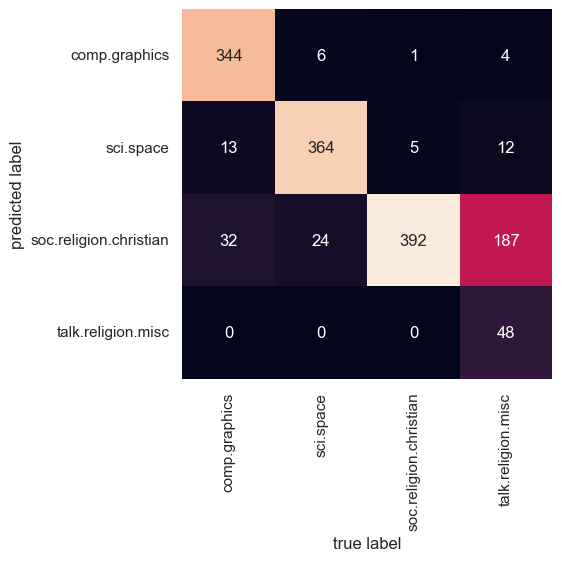

In [32]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, 
            fmt='d', cbar=False,
            xticklabels=train.target_names, 
            yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [33]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    print(pred)
    return train.target_names[pred[0]]

In [34]:
predict_category('sending a payload to the ISS')

[1]


'sci.space'

In [35]:
predict_category('discussing islam vs atheism')

[2]


'soc.religion.christian'

In [36]:
predict_category('determining the screen resolution')

[0]


'comp.graphics'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking. Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.

## When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

# Linear Regression

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

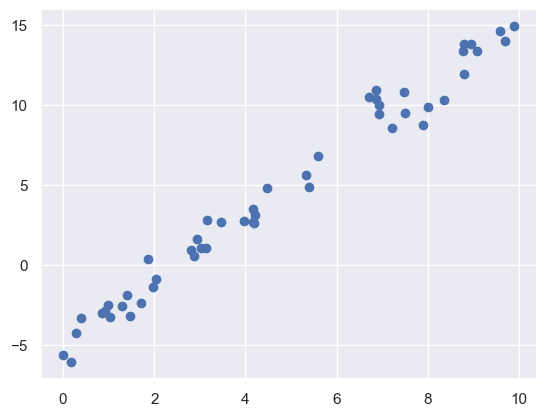

In [38]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

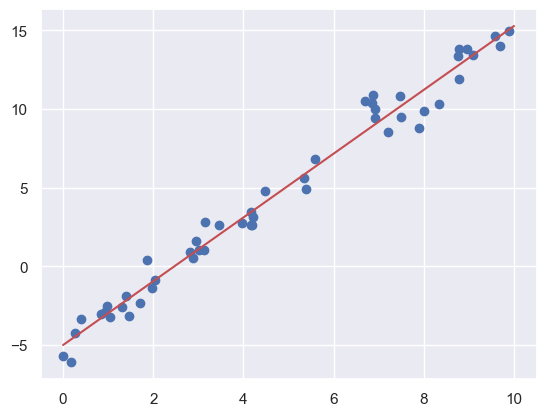

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, 'r');

In [40]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.0272088103606953
Model intercept: -4.998577085553204


``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [41]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [42]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our originall array into a new array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression.

The cleanest way to accomplish this is to use a pipeline. Let's make a 7th-degree polynomial model in this way:

In [43]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

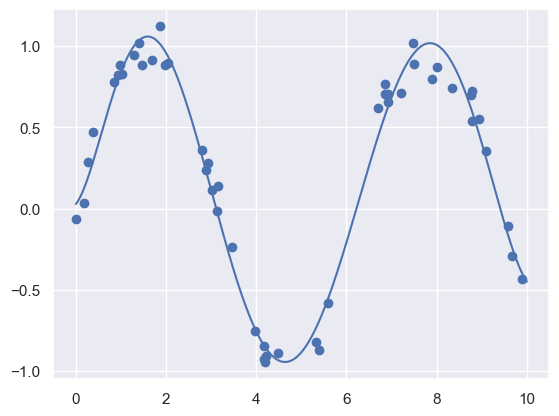

In [44]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

### Gaussian basis functions

Of course, other basis functions are possible.
For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.
The result might look something like the following figure:

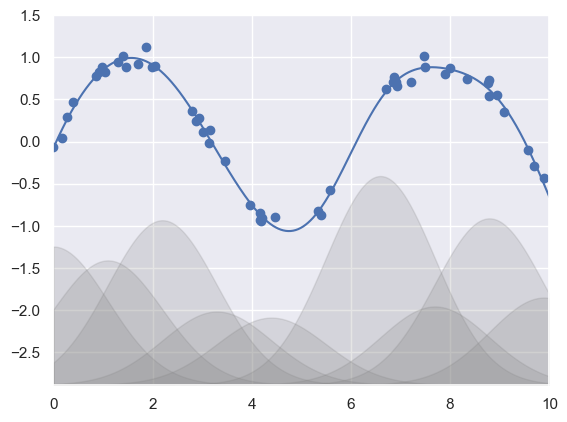

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly-spaced Gaussian Features for 1D input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)

gauss_model = make_pipeline(GaussianFeatures(10, 1.0),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

gf = gauss_model.named_steps['gaussianfeatures']
lm = gauss_model.named_steps['linearregression']

fig, ax = plt.subplots()

for i in range(10):
    selector = np.zeros(10)
    selector[i] = 1
    Xfit = gf.transform(xfit[:, None]) * selector
    yfit = lm.predict(Xfit)
    ax.fill_between(xfit, yfit.min(), yfit, color='gray', alpha=0.2)

ax.scatter(x, y)
ax.plot(xfit, gauss_model.predict(xfit[:, np.newaxis]))
ax.set_xlim(0, 10)
ax.set_ylim(yfit.min(), 1.5)

fig.savefig('gaussian-basis.png')

The shaded regions in the plot are the scaled basis functions, and when added together they reproduce the smooth curve through the data.
These Gaussian basis functions are not built into Scikit-Learn, but we can write a custom transformer that will create them, as shown here and illustrated in the following figure (Scikit-Learn transformers are implemented as Python classes; reading Scikit-Learn's source is a good way to see how they can be created):

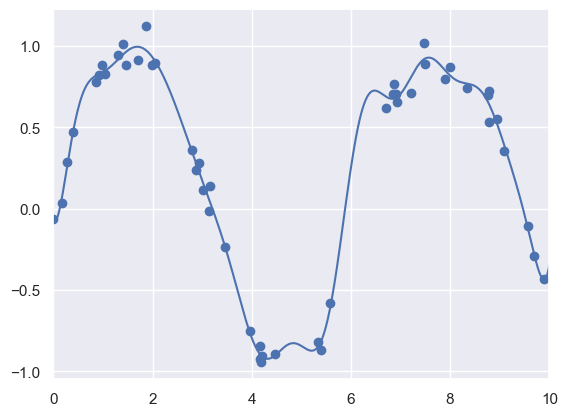

In [47]:
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

## Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting. For example, if we choose too many Gaussian basis functions, we end up with results that don't look so good:

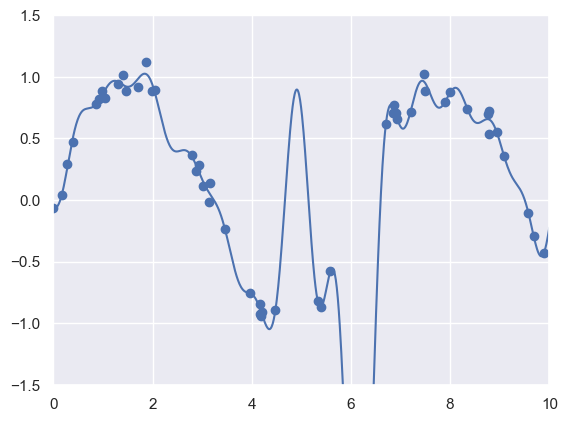

In [48]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.
We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:

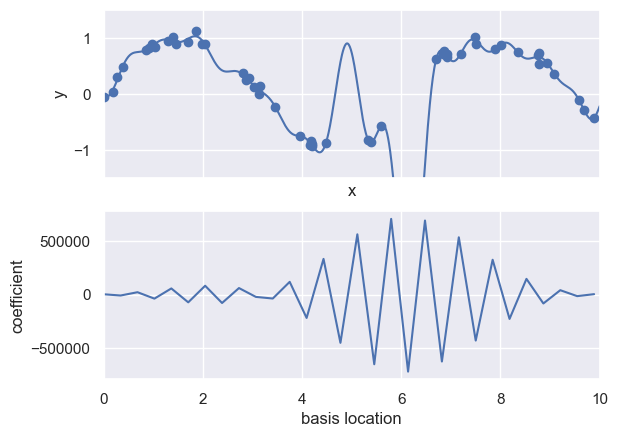

In [49]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

The lower panel of this figure shows the amplitude of the basis function at each location. This is typical over-fitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out. We know that such behavior is problematic, and it would be nice if we could limit such spikes expliticly in the model by penalizing large values of the model parameters. Such a penalty is known as regularization, and comes in several forms.

### Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.
This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:

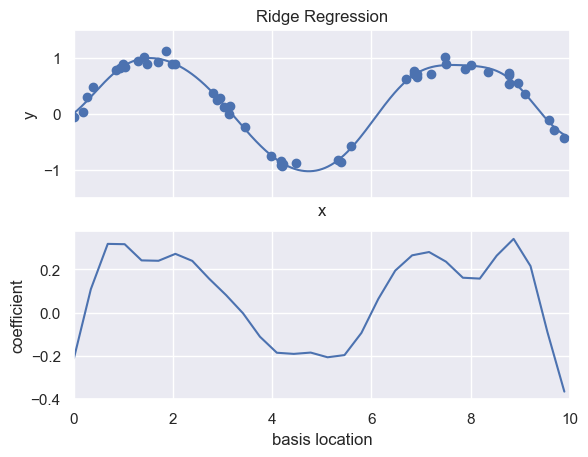

In [50]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.
One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost than the original linear regression model.

### Lasso regression ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients:

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


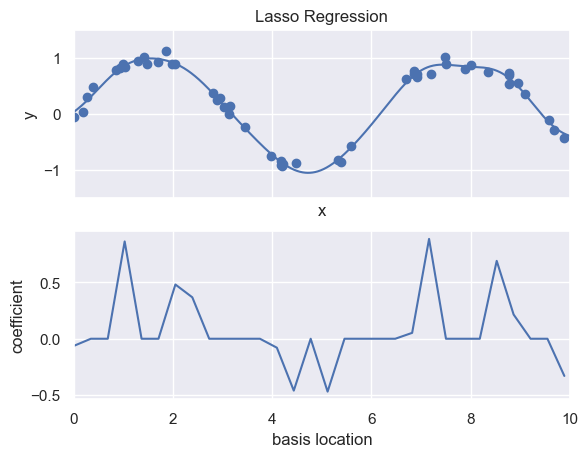

In [51]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

With the lasso regression penalty, the majority of the coefficients are exactly zero, with the functional behavior being modeled by a small subset of the available basis functions. As with ridge regularization, the 𝛼 parameter tunes the strength of the penalty, and should be determined via, for example, cross-validation (refer back to Hyperparameters and Model Validation for a discussion of this).

## Example: Predicting Bicycle Traffic

As an example, let's take a look at whether we can predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors.

In this section, we will join the bike data with another dataset, and try to determine the extent to which weather and seasonal factors—temperature, precipitation, and daylight hours—affect the volume of bicycle traffic through this corridor.
Fortunately, the NOAA makes available their daily [weather station data](http://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND) (I used station ID USW00024233) and we can easily use Pandas to join the two data sources.
We will perform a simple linear regression to relate weather and other information to bicycle counts, in order to estimate how a change in any one of these parameters affects the number of riders on a given day.

In particular, this is an example of how the tools of Scikit-Learn can be used in a statistical modeling framework, in which the parameters of the model are assumed to have interpretable meaning.
As discussed previously, this is not a standard approach within machine learning, but such interpretation is possible for some models.

Let's start by loading the two datasets, indexing by date:

In [57]:
!curl https://data.seattle.gov/api/views/65db-xm6k/rows.csv -o ./FremontBridge.csv 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2816k    0 2816k    0     0  1217k      0 --:--:--  0:00:02 --:--:-- 1217k


In [59]:
import pandas as pd
counts = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)

In [60]:
weather = pd.read_csv('data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [61]:
counts.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [62]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [63]:
daily = counts.resample('d').sum()
daily

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,7042.0,3520.0,3522.0
2012-10-04,6950.0,3416.0,3534.0
2012-10-05,6296.0,3116.0,3180.0
2012-10-06,4012.0,2160.0,1852.0
2012-10-07,4284.0,2382.0,1902.0
...,...,...,...
2021-04-26,2411.0,929.0,1482.0
2021-04-27,2242.0,911.0,1331.0
2021-04-28,2382.0,974.0,1408.0


In [64]:
daily['Total'] = daily.sum(axis=1)
daily.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Total
Date,,,,
2012-10-03,7042.0,3520.0,3522.0,14084.0
2012-10-04,6950.0,3416.0,3534.0,13900.0
2012-10-05,6296.0,3116.0,3180.0,12592.0
2012-10-06,4012.0,2160.0,1852.0,8024.0
2012-10-07,4284.0,2382.0,1902.0,8568.0


In [65]:
daily = daily[['Total']] # remove other columns
daily.head()

,Total
Date,
2012-10-03,14084.0
2012-10-04,13900.0
2012-10-05,12592.0
2012-10-06,8024.0
2012-10-07,8568.0


The patterns of use generally vary from day to day; let's account for this in our data by adding binary columns that indicate the day of the week:

In [66]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily.insert(loc=1, column=days[i], value = (daily.index.dayofweek == i).astype(float))

In [43]:
daily.head()

,Total,Sun,Sat,Fri,Thu,Wed,Tue,Mon
Date,,,,,,,,
2012-10-03,14084.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-06,8024.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-07,8568.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0



Similarly, we might expect riders to behave differently on holidays; let's add an indicator of this as well:

In [44]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
holidays

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28',
               '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12',
               '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21',
               '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02',
               '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25',
               '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26',
               '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11',
               '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19',
               '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25',
               '2016-01-01'],
              dtype='datetime64[ns]', freq=None)

In [45]:
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily.head()

,Total,Sun,Sat,Fri,Thu,Wed,Tue,Mon,holiday
Date,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2012-10-05,12592.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2012-10-06,8024.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
2012-10-07,8568.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [46]:
daily[daily['holiday'] == 1].head()

,Total,Sun,Sat,Fri,Thu,Wed,Tue,Mon,holiday
Date,,,,,,,,,
2012-10-08,14148.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2012-11-12,6524.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2012-11-22,2216.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2012-12-25,392.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2013-01-01,2712.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [47]:
daily['holiday'].fillna(0, inplace=True)
daily.head()

,Total,Sun,Sat,Fri,Thu,Wed,Tue,Mon,holiday
Date,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,12592.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-06,8024.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-07,8568.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
daily[daily['holiday']==1].head()

,Total,Sun,Sat,Fri,Thu,Wed,Tue,Mon,holiday
Date,,,,,,,,,
2012-10-08,14148.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2012-11-12,6524.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2012-11-22,2216.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2012-12-25,392.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2013-01-01,2712.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


We also might suspect that the hours of daylight would affect how many people ride; let's use the standard astronomical calculation to add this information:

(8.0, 17.0)

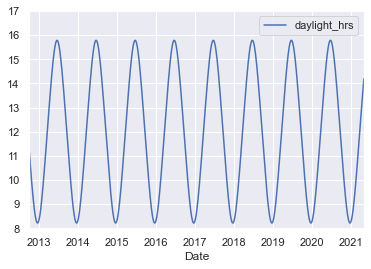

In [49]:
import datetime

def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - datetime.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [50]:
daily.head()

,Total,Sun,Sat,Fri,Thu,Wed,Tue,Mon,holiday,daylight_hrs
Date,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.277359
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142
2012-10-05,12592.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.161038
2012-10-06,8024.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.103056
2012-10-07,8568.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.045208


We can also add the average temperature and total precipitation to the data. In addition to the inches of precipitation, let's add a flag that indicates whether a day is dry (has zero precipitation):

In [51]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03,Temp (C),dry day
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.000000,0,0,12.8,5.0,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,8.90,1
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.429134,0,0,10.6,2.8,45,180,200,...,-9999,-9999,-9999,1,1,-9999,-9999,-9999,6.70,0
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.031496,0,0,11.7,7.2,23,180,170,...,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,9.45,0
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.799213,0,0,12.2,5.6,47,180,190,...,-9999,-9999,-9999,1,1,-9999,-9999,-9999,8.90,0
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0.051181,0,0,8.9,2.8,61,200,220,...,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999,5.85,0


In [52]:
daily.head()

,Total,Sun,Sat,Fri,Thu,Wed,Tue,Mon,holiday,daylight_hrs
Date,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.277359
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142
2012-10-05,12592.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.161038
2012-10-06,8024.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.103056
2012-10-07,8568.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.045208


In [53]:
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])
daily.head()

,Total,Sun,Sat,Fri,Thu,Wed,Tue,Mon,holiday,daylight_hrs,PRCP,Temp (C),dry day
Date,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0
2012-10-05,12592.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0
2012-10-06,8024.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.103056,0.0,15.85,1.0
2012-10-07,8568.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.045208,0.0,15.85,1.0


Finally, let's add a counter that increases from day 1, and measures how many years have passed. This will let us measure any observed annual increase or decrease in daily crossings:

In [54]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [55]:
daily.head()

,Total,Sun,Sat,Fri,Thu,Wed,Tue,Mon,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,12592.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,8024.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,8568.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.045208,0.0,15.85,1.0,0.010959


With this in place, we can choose the columns to use, and fit a linear regression model to our data. We will set fit_intercept = False, because the daily flags essentially operate as their own day-specific intercepts:

In [56]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

In [57]:
daily.head()

,Total,Sun,Sat,Fri,Thu,Wed,Tue,Mon,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual,predicted
Date,,,,,,,,,,,,,,,
2012-10-03,14084.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000,13853.601102
2012-10-04,13900.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740,13447.791325
2012-10-05,12592.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479,12643.735292
2012-10-06,8024.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219,7632.376697
2012-10-07,8568.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.045208,0.0,15.85,1.0,0.010959,7481.794465


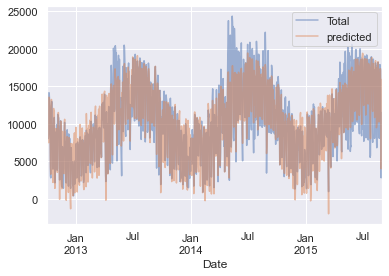

In [58]:
daily[['Total', 'predicted']].plot(alpha=0.5);

It is evident that we have missed some key features, especially during the summer time. Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures). Nevertheless, our rough approximation is enough to give us some insights, and we can take a look at the coefficients of the linear model to estimate how much each feature contributes to the daily bicycle count:

In [59]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon             2019.531023
Tue             2440.935744
Wed             2370.694566
Thu             1929.432461
Fri              711.921382
Sat            -4413.206842
Sun            -4534.268983
holiday        -4749.605523
daylight_hrs     515.406045
PRCP           -2659.339527
dry day         2190.794369
Temp (C)         260.651164
annual           107.770852
dtype: float64

In [60]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)

In [61]:
print(pd.DataFrame({'effect': params.round(), 'error': err.round()}))

              effect  error
Mon           2020.0  345.0
Tue           2441.0  333.0
Wed           2371.0  331.0
Thu           1929.0  341.0
Fri            712.0  324.0
Sat          -4413.0  318.0
Sun          -4534.0  332.0
holiday      -4750.0  653.0
daylight_hrs   515.0   36.0
PRCP         -2659.0  249.0
dry day       2191.0  133.0
Temp (C)       261.0   14.0
annual         108.0   71.0


We first see that there is a relatively stable trend in the weekly baseline: there are many more riders on weekdays than on weekends and holidays.
We see that for each additional hour of daylight, 129 ± 9 more people choose to ride; a temperature increase of one degree Celsius encourages 65 ± 4 people to grab their bicycle; a dry day means an average of 548 ± 33 more riders, and each inch of precipitation means 665 ± 62 more people leave their bike at home.
Once all these effects are accounted for, we see a modest increase of 27 ± 18 new daily riders each year.

Our model is almost certainly missing some relevant information. For example, nonlinear effects (such as effects of precipitation *and* cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model.
Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday's numbers, or the effect of an unexpected sunny day after a streak of rainy days).